<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_06_interpolacion.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 6
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

In [1]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
import numpy as np
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import CubicHermiteSpline
from scipy.optimize import bisect
from io import BytesIO
import pandas as pd
import plotly as py
import sympy as sp
from IPython.display import display, HTML
import math as mt

## __Activity__: 
 For  the function $f(x) = \tan (x)$ between $-\frac{\pi}{4}$ and $\frac{\pi}{4}$ using $N=10$ points (9 intervals). Plot both, the interpolation and the original function.

Explore the behaviour of the Linear Interpolation algorithm when varying the number of data used.

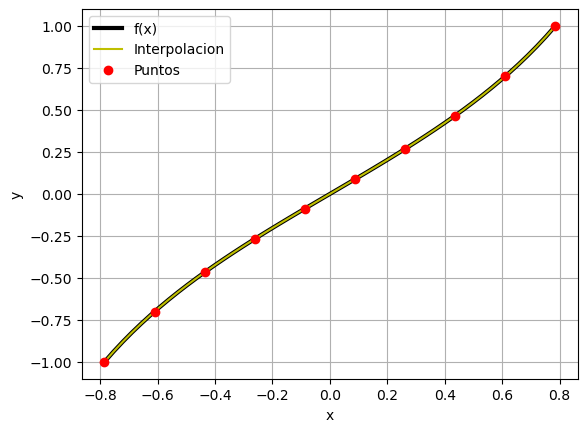

In [2]:
#Funcion
f_x = lambda x: np.tan(x)

xk = np.linspace(-np.pi/4 ,np.pi/4,10)     
yk = f_x(xk)                                      

x=np.linspace(-np.pi/4 ,np.pi/4) 

#Interpolacion de Lagrange
P=lagrange(xk,yk)             

#Grafica

plt.plot(x,f_x(x),'k',label='f(x)',linewidth=3)
plt.plot(x,P(x),'y-',label='Interpolacion')
plt.plot(xk,yk,'ro',label='Puntos')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

## __Activity__: 
Apply lagrange interpolations with the following points, work with pandas data frame


x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])

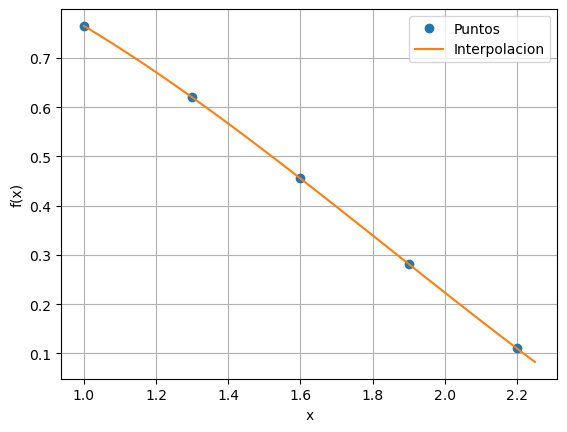

In [3]:
pf = pd.DataFrame({'x':np.array([1, 1.3, 1.6, 1.9, 2.2]),
                   'f(x)':np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])})

#Aplicamos la interpolacion de Lagrange
poly = lagrange(pf['x'],pf['f(x)'])
x = np.linspace(1,2.25,100)
plt.plot(pf['x'],pf['f(x)'],'o',label='Puntos')
plt.plot(x,poly(x),label='Interpolacion')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend()

__Activity__:  Movement with uniform acceleration
1. Define a polynomial for the movement with uniform acceleration:
\begin{align}
x(t)=x_0+v_0 (t-t_0)+\tfrac{1}{2} a (t-t_0)^2 \,,
\end{align}
2. Use the previous formula expressed as polynomial of degree 2, to solve the following problem with `np.poly1d`: 
    * A car departs from rest with a constant acceleration of $6\text{m}\cdot\text{s}^{-2}$ and travels through a flat and straight road. 10 seconds later a second pass for the same starting point and in the same direction with an initial speed of $10\text{m}\cdot\text{s}^{-1}$ and a constant acelleration of $10\text{m}\cdot\text{s}^{-2}$. Find the time and distance at which the two cars meet. *
    
_Hint_. 
\begin{align}
x(t)=x_0-v_0t_0+\frac{1}{2}at_0^2 +(v_0-at_0)t+\tfrac{1}{2} a t^2 
\end{align}



In [4]:
#Definimos x(t) con np.poly1d:

def x(x0,v0,t0,a):
    return np.poly1d([a/2,v0-a*t0,x0-v0*t0+(1/2)*a*t0**2], variable='t') 

In [5]:
#Data

# Car 1:
t01 = 0  # [s]
x01 = 0  # [m]
v01 = 0  # [m/s]
a1 = 6   # [m/s^2]
arg1 =(t01,x01,v01,a1)

# Car 2:
t02 = 10 #[s]
x02 = 0  #[m]
v02 = 10 #[m/s]
a2 = 10  #[m/s^2]

arg2 =(t02,x02,v02,a2)

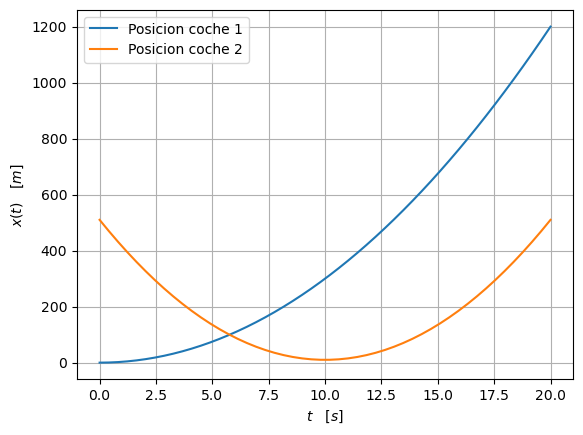

In [6]:
t =np.linspace(0,20)
 
# Gráfica de las posiciones de los coches en función del tiempo

plt.plot(t,x(*arg1)(t), label='Posicion coche 1')
plt.xlabel('$t \quad [s]$')
plt.ylabel('$x(t) \quad [m]$')
plt.plot(t,x(*arg2)(t), label='Posicion coche 2')
plt.grid()
plt.legend()

In [7]:
#Para encontrar el intecepto de las dos rectas, podemos restarlas y encontrar el cero de la funcion resultante:
g = lambda t: x(*arg1)(t)-x(*arg2)(t)

El tiempo en el que se interceptan es: 5.76 s


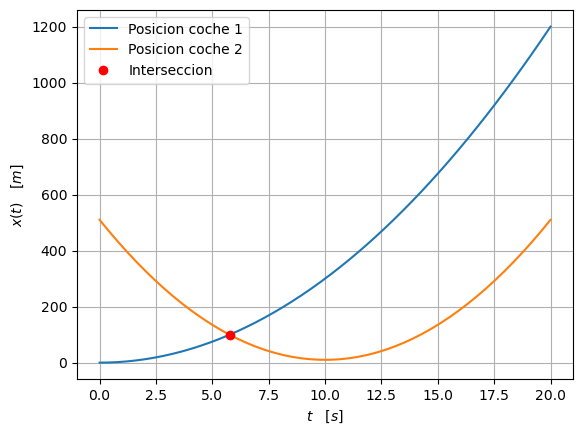

In [8]:
#Aplicando el metodo de la biseccion
root = bisect(g,0,20)
print(f'El tiempo en el que se interceptan es: {root:.2f} s')

plt.plot(t,x(*arg1)(t), label='Posicion coche 1')
plt.xlabel('$t \quad [s]$')
plt.ylabel('$x(t) \quad [m]$')
plt.plot(t,x(*arg2)(t), label='Posicion coche 2')
plt.plot(root,x(*arg1)(root),'ro',label='Interseccion')
plt.grid()
plt.legend()



## __Activity__: 
Consideremos la imagen del planetario de medellin u otra imagen sobre la cual podamos realizar un ajuste, descargue la imagen de google.


![img](https://github.com/hernansalinas/autogrades/blob/main/Actividades_clase/imagenes/planetario.png?raw=true)
1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$, equiespaciados en $[a,b]$,  definidos adecuadamente para que los puntos esten (aproximadamente) situados en la superficie del domo,  del edificio que representa la imagen.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 



5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 


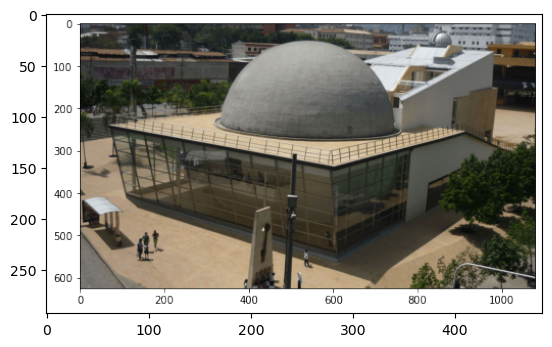

In [9]:
#Cargar imagen

url= 'https://raw.githubusercontent.com/hernansalinas/autogrades/main/Actividades_clase/imagenes/planetario.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.show()

2. Definir una lista de puntos, $x_i$, equiespaciados en $[a,b]$,  definidos adecuadamente para que los puntos esten (aproximadamente) situados en la superficie del domo,  del edificio que representa la imagen.

In [10]:
#Coordenadas de los pixeles del contorno del domo del planetario(fueron calculadas a mano utilizando jupyter notebook)
x = np.array([170.4,174.3,187.0,207.6,235.1,259.5,293.8,329.1,338.9,341.9])
f_x = np.array([103.0, 87.3,63.2,42.6,28.9,27.0,35.8,66.7,92.2,112.6])

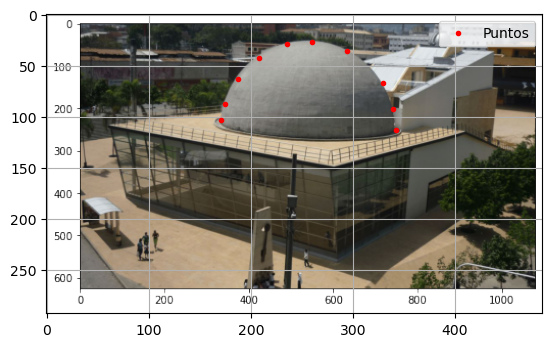

In [11]:
plt.imshow(img)
plt.plot(x,f_x,'r.',label='Puntos')
plt.legend()
plt.grid()

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

In [12]:
#Interpolación de Lagrange
pl = lagrange(x,f_x)

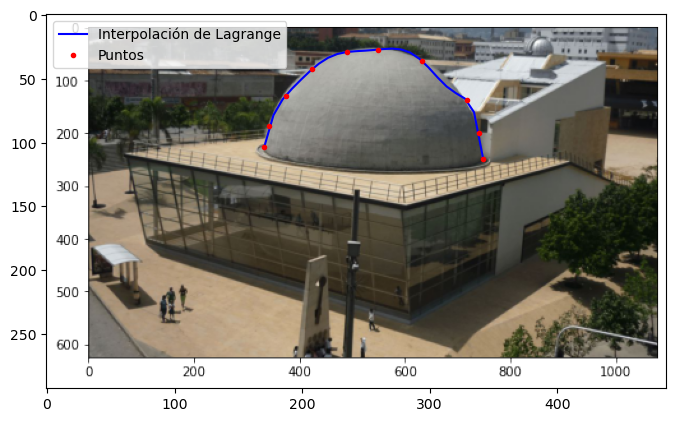

In [13]:
#Defina el rango de x para la interpolación
xn = np.linspace(min(x),max(x),25)

#Graficamos la imagen y la interpolación de Lagrange
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.imshow(img)
ax.plot(xn,pl(xn),'b',label='Interpolación de Lagrange')
ax.plot(x,f_x,'r.',label='Puntos')
ax.legend()
plt.show()

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 


In [14]:
#Interpolación con Cubic Spline
pcs = CubicSpline(x,f_x,extrapolate=True)

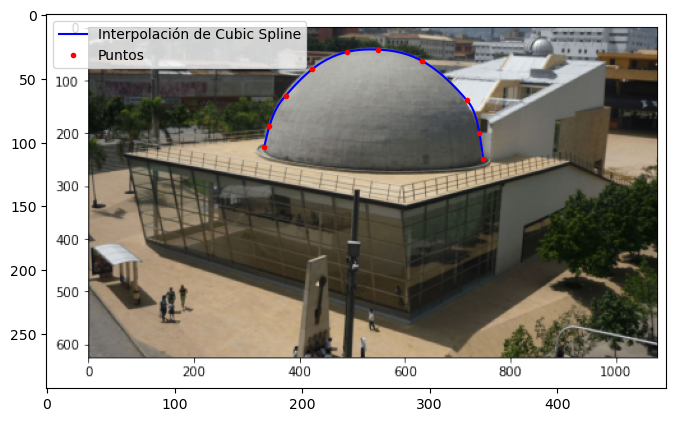

In [15]:
#Defina el rango de x para la interpolación
x_n = np.linspace(min(x),max(x),1000)

#Graficamos la interpolación con Cubic Spline
fig, ax = plt.subplots( figsize=(8, 6))

ax.imshow(img)
ax.plot(x_n,pcs(x_n),'b',label='Interpolación de Cubic Spline')
ax.plot(x,f_x,'r.',label='Puntos')
ax.legend()
plt.show()

5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

La interpolación de Lagrange presentó una pequeña oscilacion en la función interpolante, puede que sea por haber utilizado un número elevado de puntos para interpolar una función compleja. Por otro lado, la interpolación de CubicSpline es una técnica de interpolación que utiliza funciones polinómicas suaves para conectar los puntos, por lo tanto no presentó oscilaciones, como se muestra en la imagen anterior. 